In [4]:
import pandas as pd

In [11]:
train_set = pd.read_csv('helper_file_1/titanic_train.csv')
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [12]:
test_set = pd.read_csv('helper_file_1/titanic_test.csv')
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [13]:
import matplotlib.pyplot as plt

(array([581.,  89.,  28.,   1.,   7.,   3.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

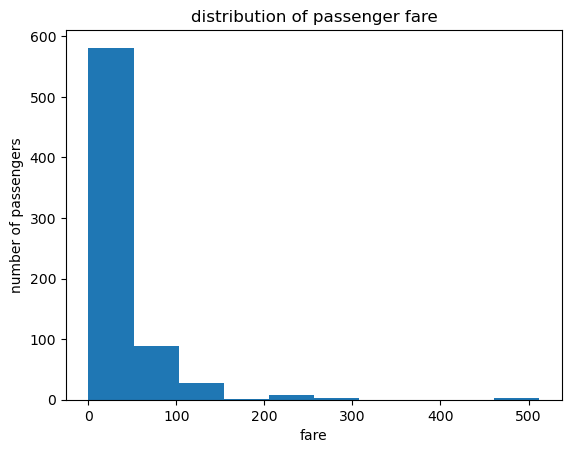

In [35]:
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.title('distribution of passenger fare')
plt.hist(train_set['Fare'])

<BarContainer object of 3 artists>

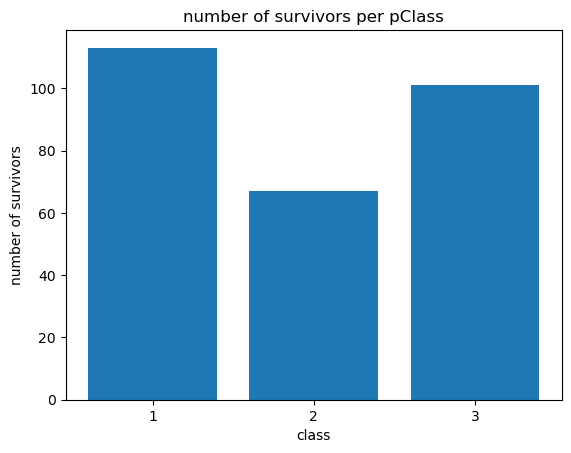

In [97]:
import numpy as np
values = [1, 2, 3]
survivorPClass = train_set[train_set['Pclass'].isin(values) & (train_set['Survived'] == 1)][['Pclass']]
result = [
    np.sum(survivorPClass['Pclass'] == x)
    for x in range(1, 4)
]
plt.title('number of survivors per pClass')
plt.xlabel('class')
plt.ylabel('number of survivors')
plt.bar(['1','2','3'],result)

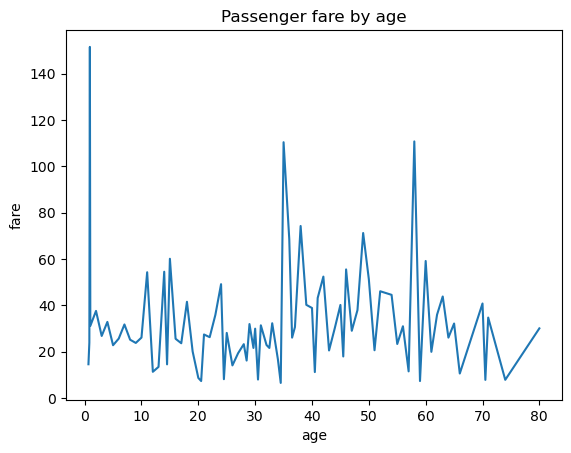

In [132]:
plt.title("Passenger fare by age")
plt.xlabel("age")
plt.ylabel("fare")
fare_age = train_set[['Age','Fare']]
average_fare_per_age = fare_age.groupby('Age')['Fare'].mean()
plt.plot(average_fare_per_age.index, average_fare_per_age.values)

<BarContainer object of 2 artists>

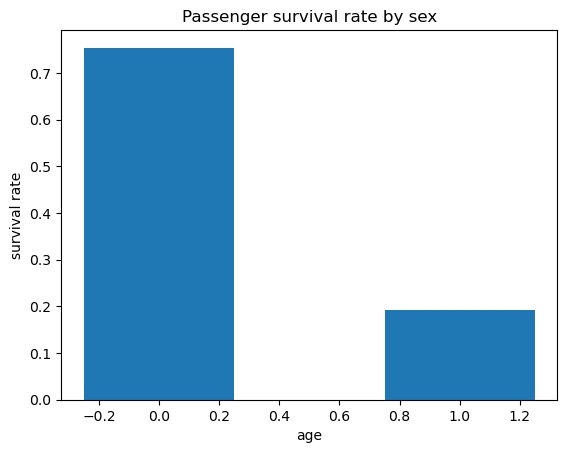

In [149]:
plt.title("Passenger survival rate by sex")
plt.xlabel("age")
plt.ylabel("survival rate")
averages = train_set.groupby('Sex')['Survived'].mean()
plt.bar(averages.index, averages.values,width=0.5)

In [164]:
x_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']
x_test = test_set.drop('Survived', axis=1)
y_test = test_set['Survived']

In [175]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest2 =  RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42)
forest3 =  RandomForestClassifier(n_estimators=80, max_depth=6, random_state=42)
forest4 =  RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
forest1.fit(x_train, y_train)
forest2.fit(x_train, y_train)
forest3.fit(x_train, y_train)
forest4.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [176]:
from sklearn.metrics import accuracy_score
y_pred_forest1 = forest1.predict(x_test)
print("Accuracy of forest1 on all parameters: ", accuracy_score(y_test,y_pred_forest1))
y_pred_forest2 = forest2.predict(x_test)
print("Accuracy of forest2 on all parameters: ", accuracy_score(y_test,y_pred_forest2))
y_pred_forest3 = forest3.predict(x_test)
print("Accuracy of forest3 on all parameters: ", accuracy_score(y_test,y_pred_forest3))
y_pred_forest4 = forest4.predict(x_test)
print("Accuracy of forest4 on all parameters: ", accuracy_score(y_test,y_pred_forest4))

Accuracy of forest1 on all parameters:  0.8603351955307262
Accuracy of forest2 on all parameters:  0.8435754189944135
Accuracy of forest3 on all parameters:  0.8770949720670391
Accuracy of forest4 on all parameters:  0.8715083798882681
